<a href="https://www.kaggle.com/code/kuntalmukherjee99/titanic-survival-by-geeky-analyst?scriptVersionId=95148883" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing Dependencies

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from IPython.display import Image
from sklearn.model_selection import cross_val_score


Importing Dataset

In [4]:
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")
submisson=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Deleting unwanted datas

In [7]:
del df_train['Name']
del df_train['Ticket']

In [8]:
uniq=df_train[['Pclass','Sex','SibSp','Parch','Embarked']]

In [9]:
for i in range(len(uniq.columns)):
    print(f' {uniq.columns[i]}--->>{uniq[uniq.columns[i]].unique()}')

 Pclass--->>[3 1 2]
 Sex--->>['male' 'female']
 SibSp--->>[1 0 3 4 2 5 8]
 Parch--->>[0 1 2 5 3 4 6]
 Embarked--->>['S' 'C' 'Q' nan]


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

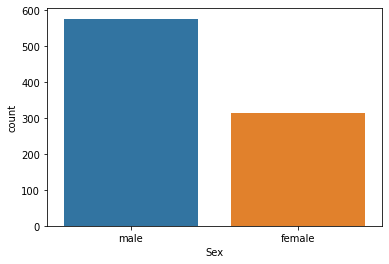

In [10]:
sns.countplot(df_train['Sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cabin', ylabel='count'>

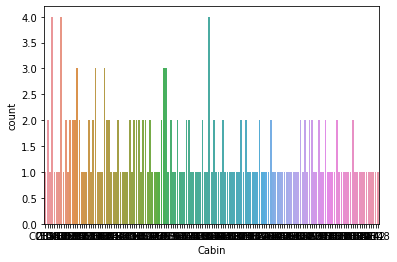

In [11]:
sns.countplot(df_train['Cabin'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

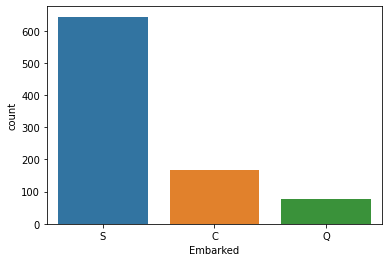

In [12]:
sns.countplot(df_train['Embarked'])

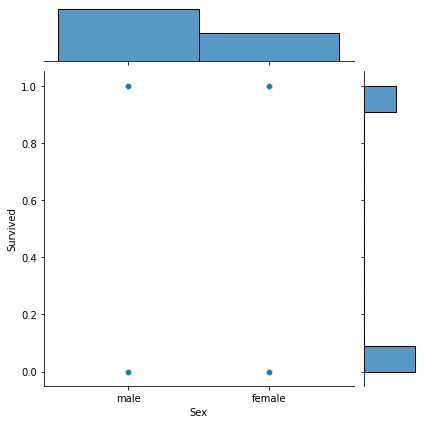

In [13]:
sns.jointplot(x=df_train['Sex'],y=df_train['Survived'])

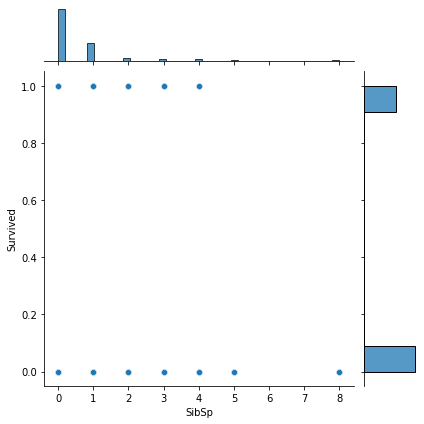

In [14]:
sns.jointplot(x=df_train['SibSp'],y=df_train['Survived'])

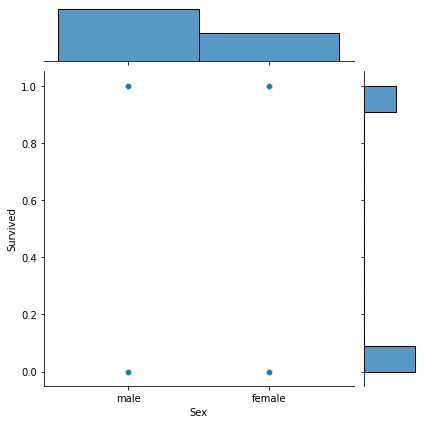

In [15]:
sns.jointplot(x=df_train['Sex'],y=df_train['Survived'])

In [16]:
df_train.Embarked=df_train.Embarked.fillna('S')


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [18]:
del df_train['Cabin']

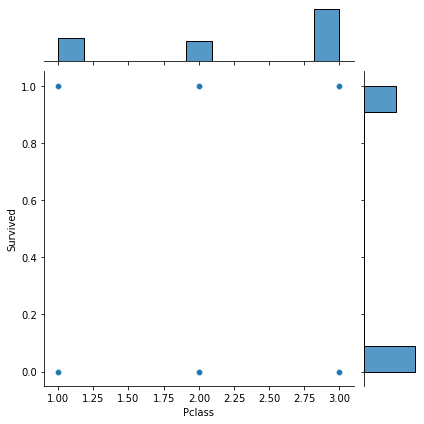

In [19]:
sns.jointplot(x=df_train['Pclass'],y=df_train['Survived'])

<AxesSubplot:>

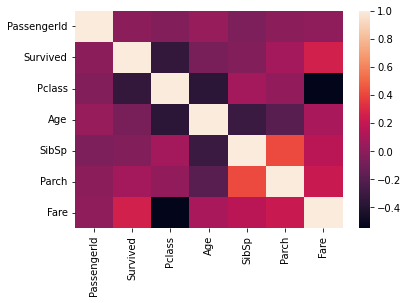

In [20]:
df_train.corr()
sns.heatmap(df_train.corr())

In [21]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df_train.Age.mode()

0    24.0
dtype: float64

In [23]:
df_train.Age=df_train.Age.fillna(df_train.Age.median())

In [24]:
del df_train['Fare']

In [25]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
nPclass=LabelEncoder()
nSex=LabelEncoder()
nEmbarked=LabelEncoder()
nAge=LabelEncoder()

In [28]:
df_train['n_pclass']=nPclass.fit_transform(df_train['Pclass'])
df_train['n_sex']=nSex.fit_transform(df_train['Sex'])
df_train['n_age']=nAge.fit_transform(df_train['Age'])
df_train['n_Embarked']=nPclass.fit_transform(df_train['Embarked'])

In [29]:
df_train.head()
x_val=df_train.drop(['PassengerId','Survived','Pclass','Sex','Age','Embarked'],axis=1)
x_val.head()




,SibSp,Parch,n_pclass,n_sex,n_age,n_Embarked
0,1,0,2,1,28,2
1,1,0,0,0,51,0
2,0,0,2,0,34,2
3,1,0,0,0,47,2
4,0,0,2,1,47,2


In [30]:
y_val=df_train['Survived']
y_val.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [32]:
model.fit(x_val,y_val)

LogisticRegression()

In [33]:
model.score(x_val,y_val)

0.7968574635241302

In [34]:
y_pred=model.predict(x_val)

In [35]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_val,y_pred)
cm

array([[463,  86],
       [ 95, 247]])

In [36]:
import matplotlib.pyplot as plt

Text(42.0, 0.5, 'True')

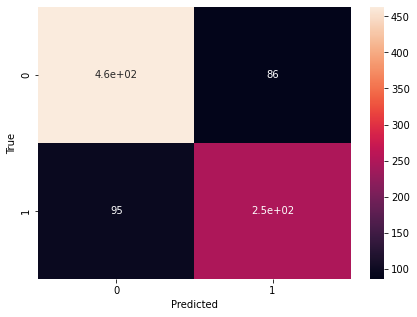

In [37]:
%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel('True')

 ### Feature Engineering for df_test starts here

In [38]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
xt_val=df_test.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis=1)

In [40]:
xt_val.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [41]:
ntPclass=LabelEncoder()
ntSex=LabelEncoder()
ntEmbarked=LabelEncoder()
ntAge=LabelEncoder()

In [42]:
xt_val['nt_pclass']=ntPclass.fit_transform(xt_val['Pclass'])
xt_val['nt_sex']=ntSex.fit_transform(xt_val['Sex'])
xt_val['nt_age']=ntAge.fit_transform(xt_val['Age'])
xt_val['nt_Embarked']=ntPclass.fit_transform(xt_val['Embarked'])

In [43]:
xtn_val=xt_val.drop(['Pclass','Sex','Age','Embarked'],axis=1)
xtn_val.head()

,SibSp,Parch,nt_pclass,nt_sex,nt_age,nt_Embarked
0,0,0,2,1,44,1
1,1,0,2,0,60,2
2,0,0,1,1,74,1
3,0,0,2,1,34,2
4,1,1,2,0,27,2


In [44]:
y_pred=model.predict(xtn_val)


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- nt_Embarked
- nt_age
- nt_pclass
- nt_sex
Feature names seen at fit time, yet now missing:
- n_Embarked
- n_age
- n_pclass
- n_sex

  warnings.warn(message, FutureWarning)


In [45]:
yt_test=submisson['Survived']

In [46]:
yt_test.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(yt_test,y_pred)

0.9043062200956937

In [48]:
confusion_matrix(yt_test,y_pred)

array([[253,  13],
       [ 27, 125]])

### Cross validation for different classifers

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
cross_val_score(LogisticRegression(),xtn_val,yt_test,cv=3)

array([1., 1., 1.])

In [51]:
cross_val_score(SVC(),xtn_val,yt_test,cv=3)

array([0.63571429, 0.64028777, 0.63309353])

In [52]:
cross_val_score(RandomForestClassifier(n_estimators=46), xtn_val, yt_test,cv=3)

array([1., 1., 1.])

In [53]:
cross_val_score(AdaBoostClassifier(n_estimators=46), xtn_val, yt_test,cv=3)

array([1., 1., 1.])

In [54]:
cross_val_score(GradientBoostingClassifier(n_estimators=46), xtn_val, yt_test,cv=3)

array([1., 1., 1.])

In [55]:
submisson.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
